In [2]:
## for eda and visuls:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
#import missingno
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

FEATURES:

AGE - AGE OF THE PATIENT

SEX - SEX OF THE PATIENT , (1:MALE , 0: FEMALE)

EXANG - EXERCISE INCLUDE ANGIA (1=YES, 0=NO)

CA - NUMBER OF MAJOR VESSELS (0-3)

CP - CHEST PAIN TYPE (Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

TRTBPS - RESTING BLOOD PRESSURE IN (MM|HG)

CHOL - CHOLESTROL IN (MG|DL) FETCHED VIA BMI SENSOR

FBS - (FASTING BLOOD SUGAR > 120 MG/DL) (1=TRUE, 0=FALSE)

REST-ECG -(RESTING ELECTROCARDIOGRAPHIC RESULTS) Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

THALACH -MAXIMUM HEAERT RATE ACHIEVED

TARGET -0=LESS CHANCE OF HEART ATTACK, 1= MORE CHANCE OF HEART ATTACK

ANSWER TO THE FOLLOWING QUESTIONS ARE GIVEN:

Increasing in age have any effect towards heart attack.

Does increase in cholestrol level in body have any effect towards the heart attack

Increase in blood pressure have any relation with heart attack.

In [3]:
# Reading Data:
df=pd.read_csv("D:/OneDrive/Máy tính/archive/heart.csv")
df.head()  #Loading the First Five Rows:

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's Look The Dimensions Of The Data:
print(f'The Data-Set Contain {df.shape[0]} Rows and {df.shape[1]} Columns')

The Data-Set Contain 303 Rows and 14 Columns


In [5]:
#Check Data Types
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
# loop through the columns and check the missing values
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :.1%}')

age - 0.0%
sex - 0.0%
cp - 0.0%
trtbps - 0.0%
chol - 0.0%
fbs - 0.0%
restecg - 0.0%
thalachh - 0.0%
exng - 0.0%
oldpeak - 0.0%
slp - 0.0%
caa - 0.0%
thall - 0.0%
output - 0.0%


CONCLUSION: The data has no missing values, so no further transformations are required.

In [7]:
#Check The Duplicates In the Data-Set:
df.duplicated().sum()

1

In [8]:
# We will drop the Duplicate value:
df=df.drop_duplicates(keep="first")

CONCLUSION:Now our Data is Clean We can do Further Analysis.

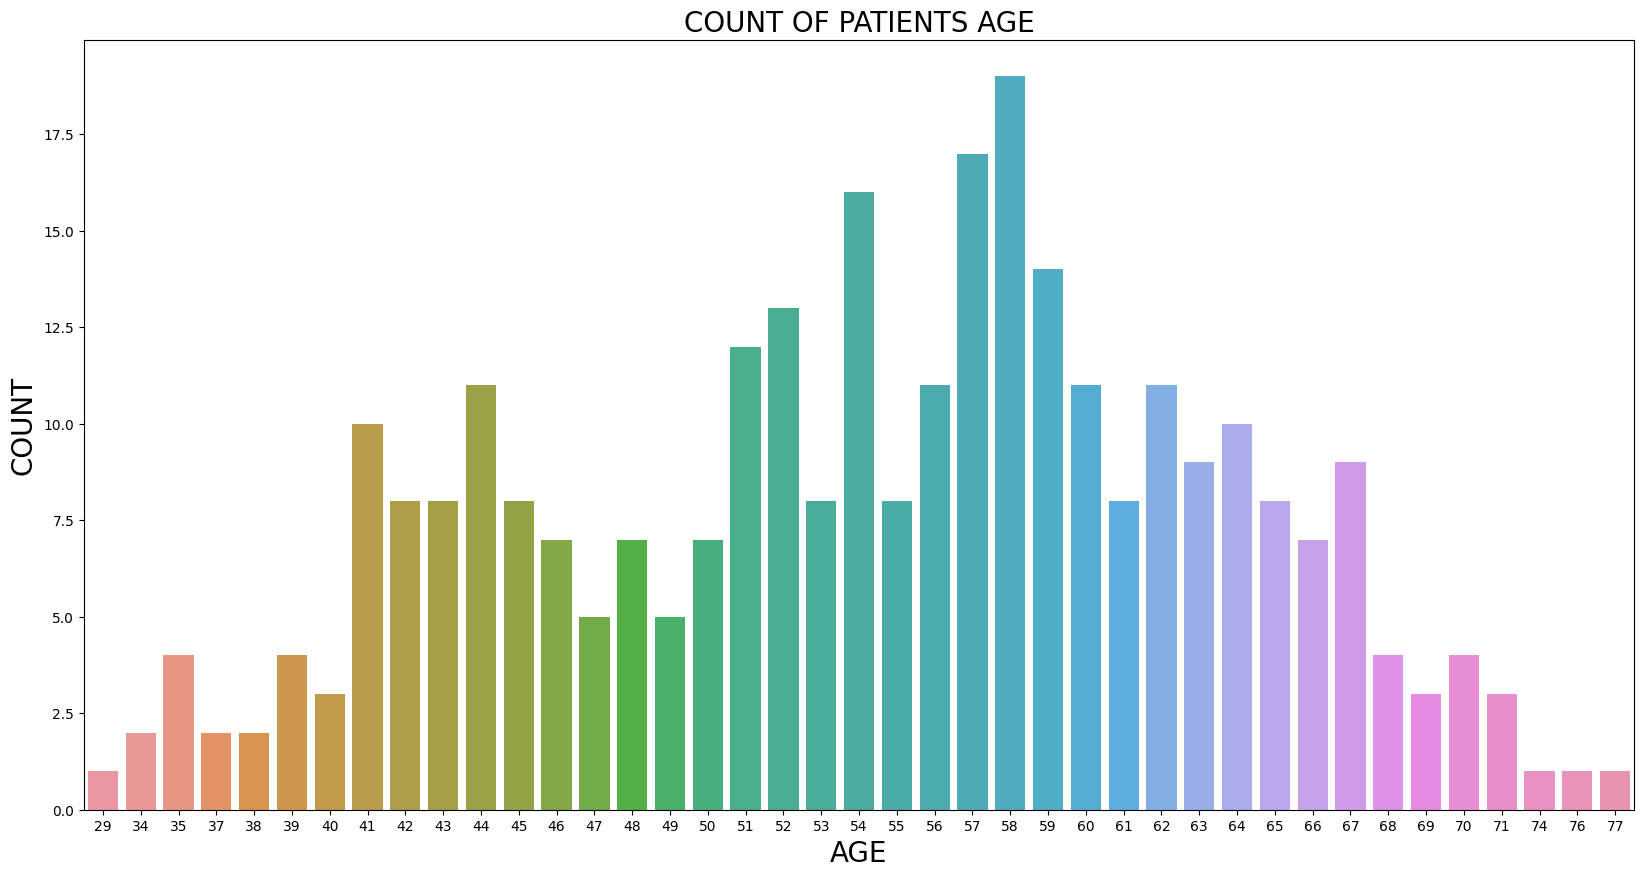

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

c:\Users\VNPT10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


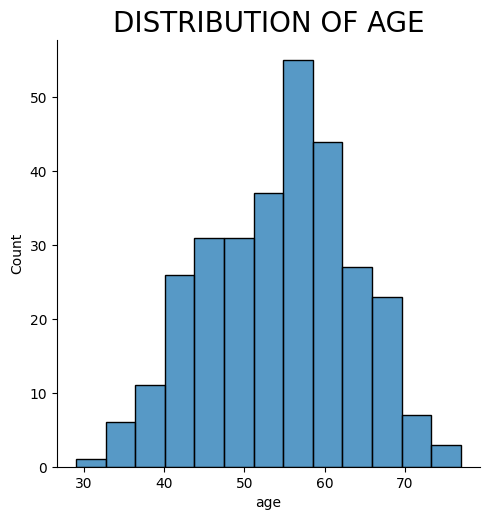

In [10]:
sns.displot(df["age"])
plt.title("DISTRIBUTION OF AGE",fontsize=20)
plt.show()

In [11]:
s = df["sex"].value_counts().reset_index()
px.pie(s, names="sex", values="count", title="%AGE OF MALE AND FEMALE PATIENTS:")


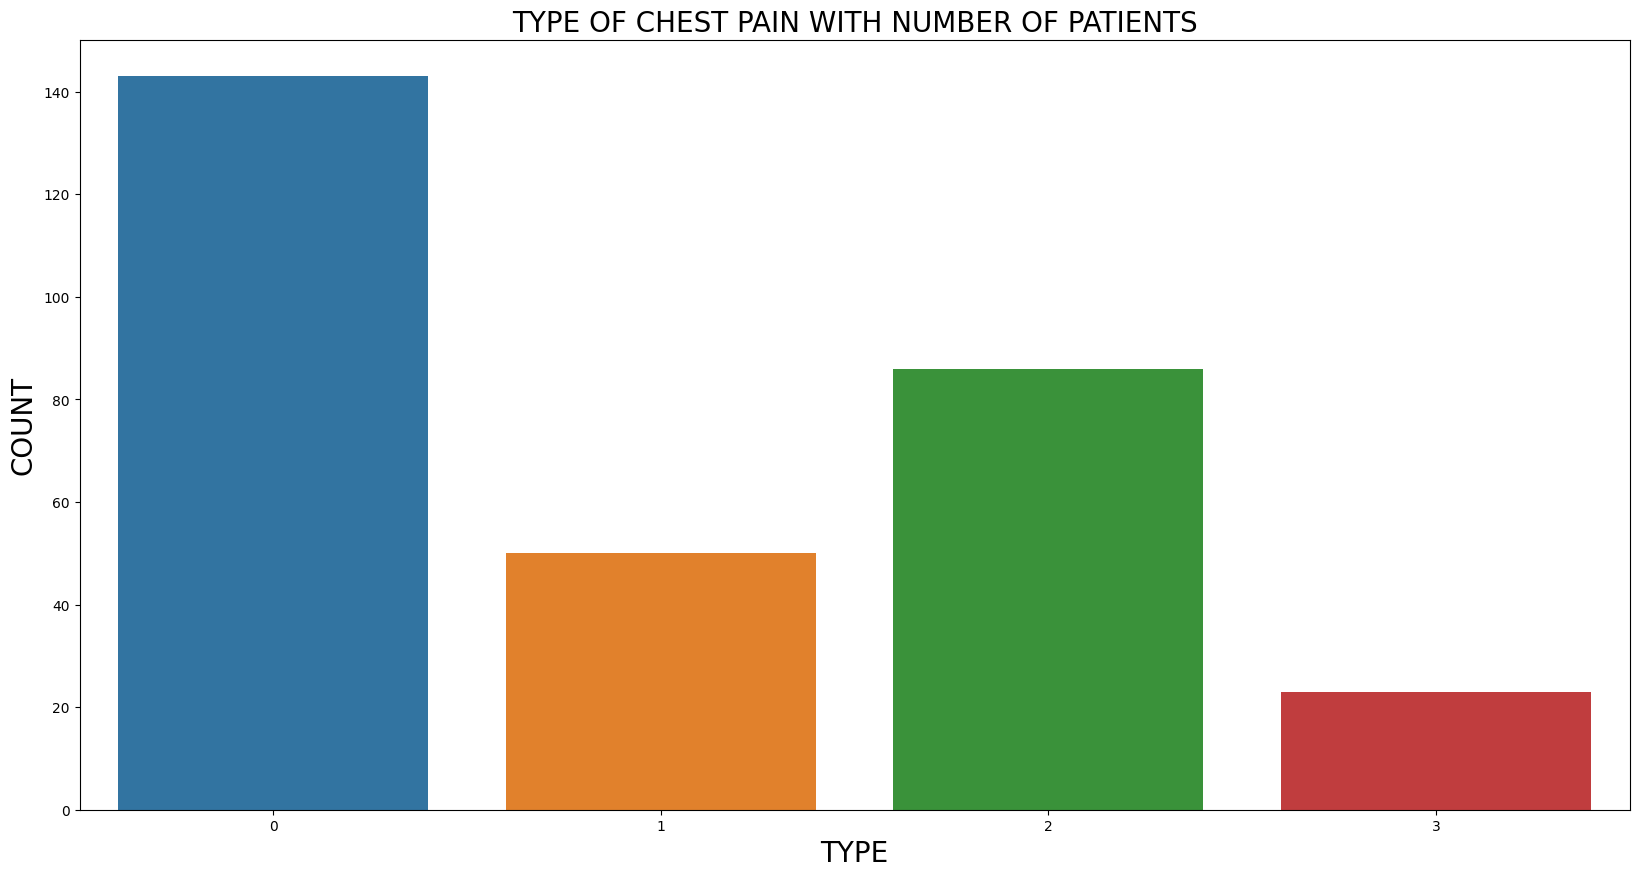

In [12]:
c = df["cp"].value_counts().reset_index(name="count")
plt.figure(figsize=(20, 10))
sns.barplot(x=c["cp"], y=c["count"])
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

c:\Users\VNPT10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



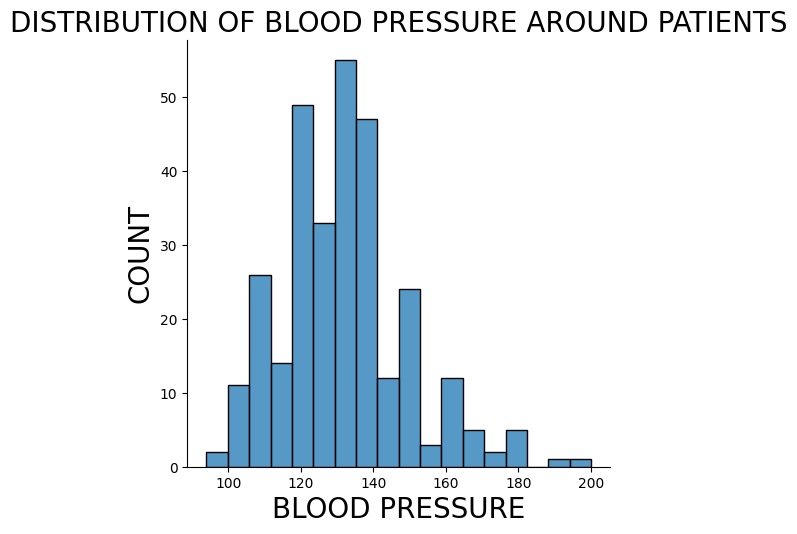

In [13]:
sns.displot(df["trtbps"])
plt.title("DISTRIBUTION OF BLOOD PRESSURE AROUND PATIENTS",fontsize=20)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

c:\Users\VNPT10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



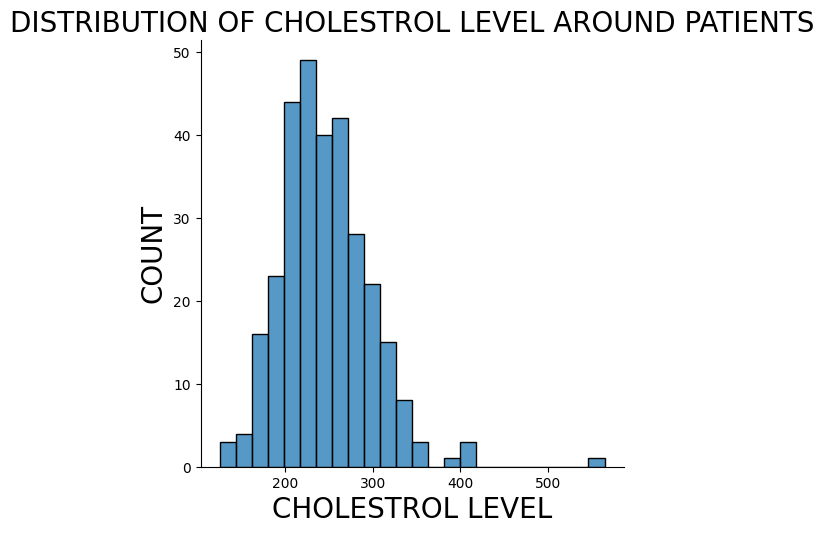

In [14]:
sns.displot(df["chol"])
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AROUND PATIENTS",fontsize=20)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

c:\Users\VNPT10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



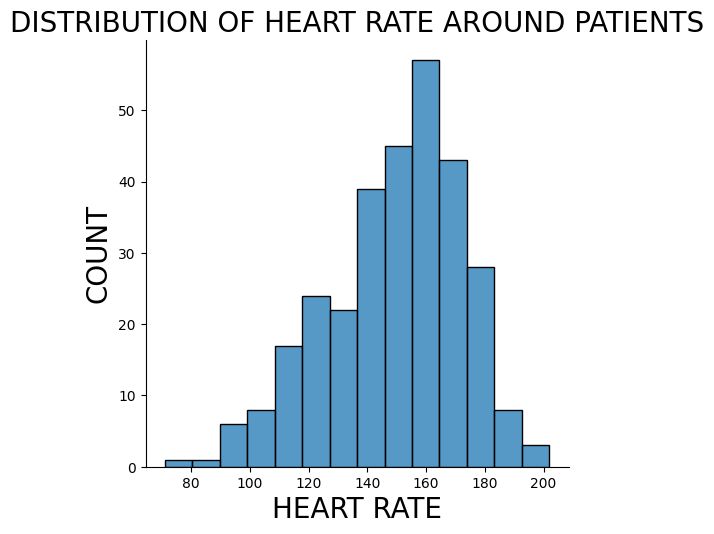

In [15]:
sns.displot(df["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=20)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

INSIGHT : Uni-Variate Analysis Of The Data:

Most of the patients have age (50-60).In which maximum number of Patients have age 56.

Around 68.2% (207) are Male patients and 31.8% (96) are Female patients .

Most of the patients have type Value 1 Chest Pain that is typical angina Value.

Most of the patients Blood Pressure lies between (130-140).

Most of the patients Chlostrol level lies between (200-250).

Most of the patients Heart Rate lies between (155-165).

3.2 Bi-Variate Analysis:

01. AGE

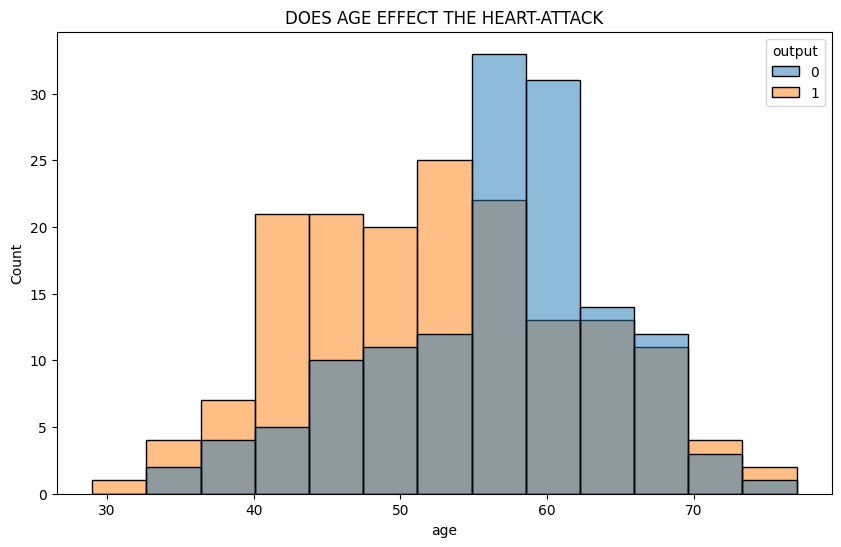

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'age', hue = 'output')
plt.title("DOES AGE EFFECT THE HEART-ATTACK")
plt.show()

In [17]:
v=pd.crosstab(df["age"],df["output"]).reset_index()

v.columns=["age","low_risk","high_risk"]

px.line(v,v["age"],v["high_risk"],title="RISK OF HIGH HEART-ATTACK WITH AGE")

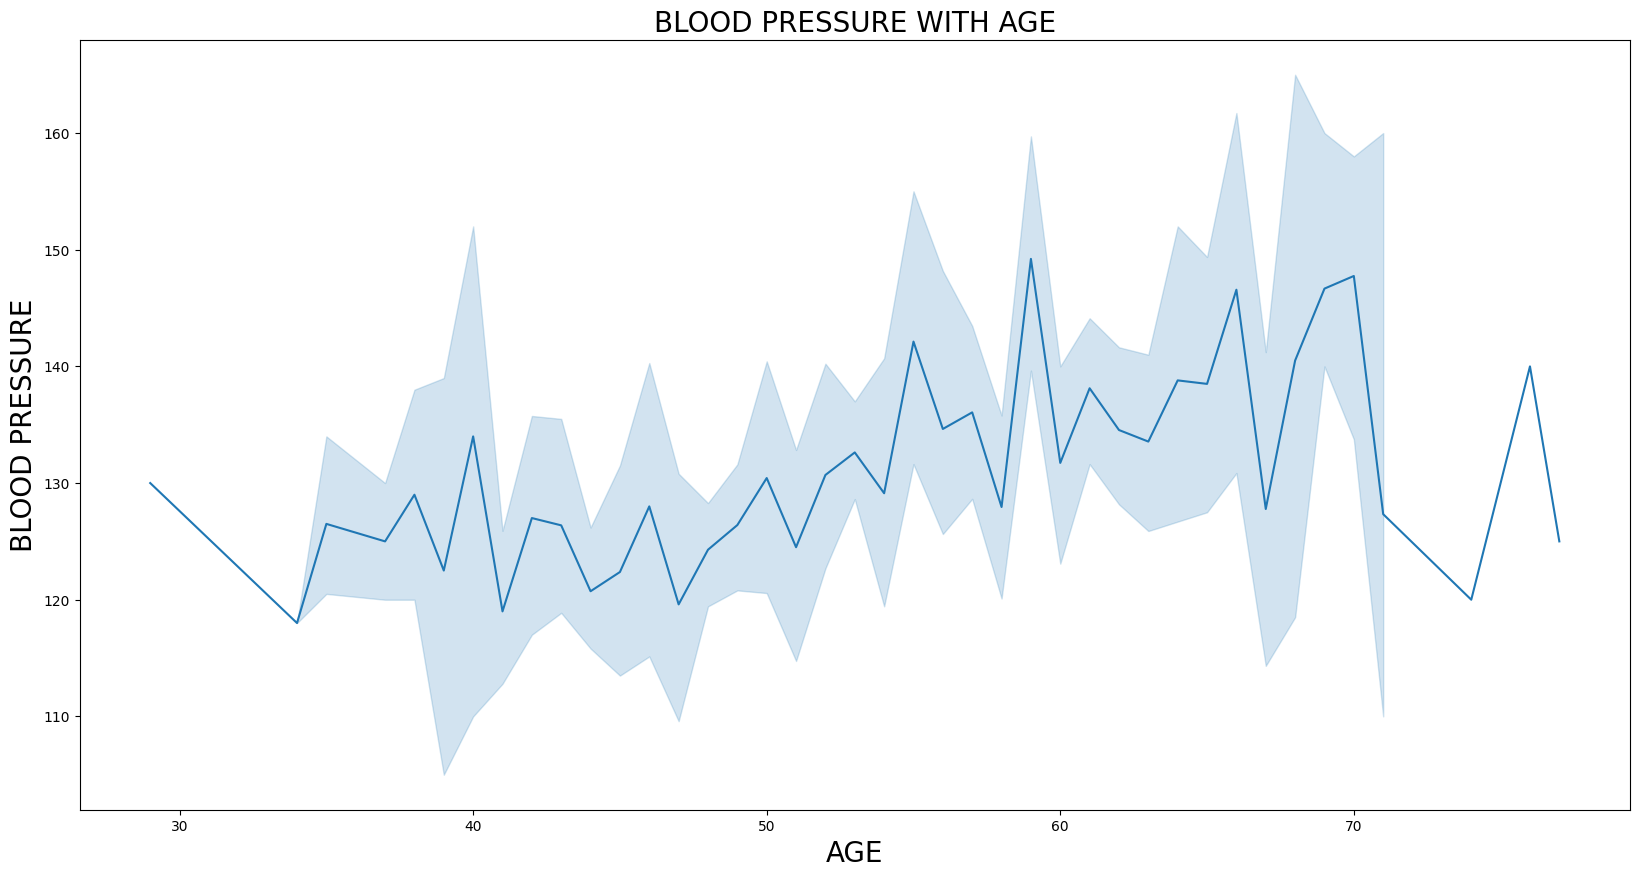

In [18]:
plt.figure(figsize=(20,10))
sns.lineplot(y="trtbps",x="age",data=df)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

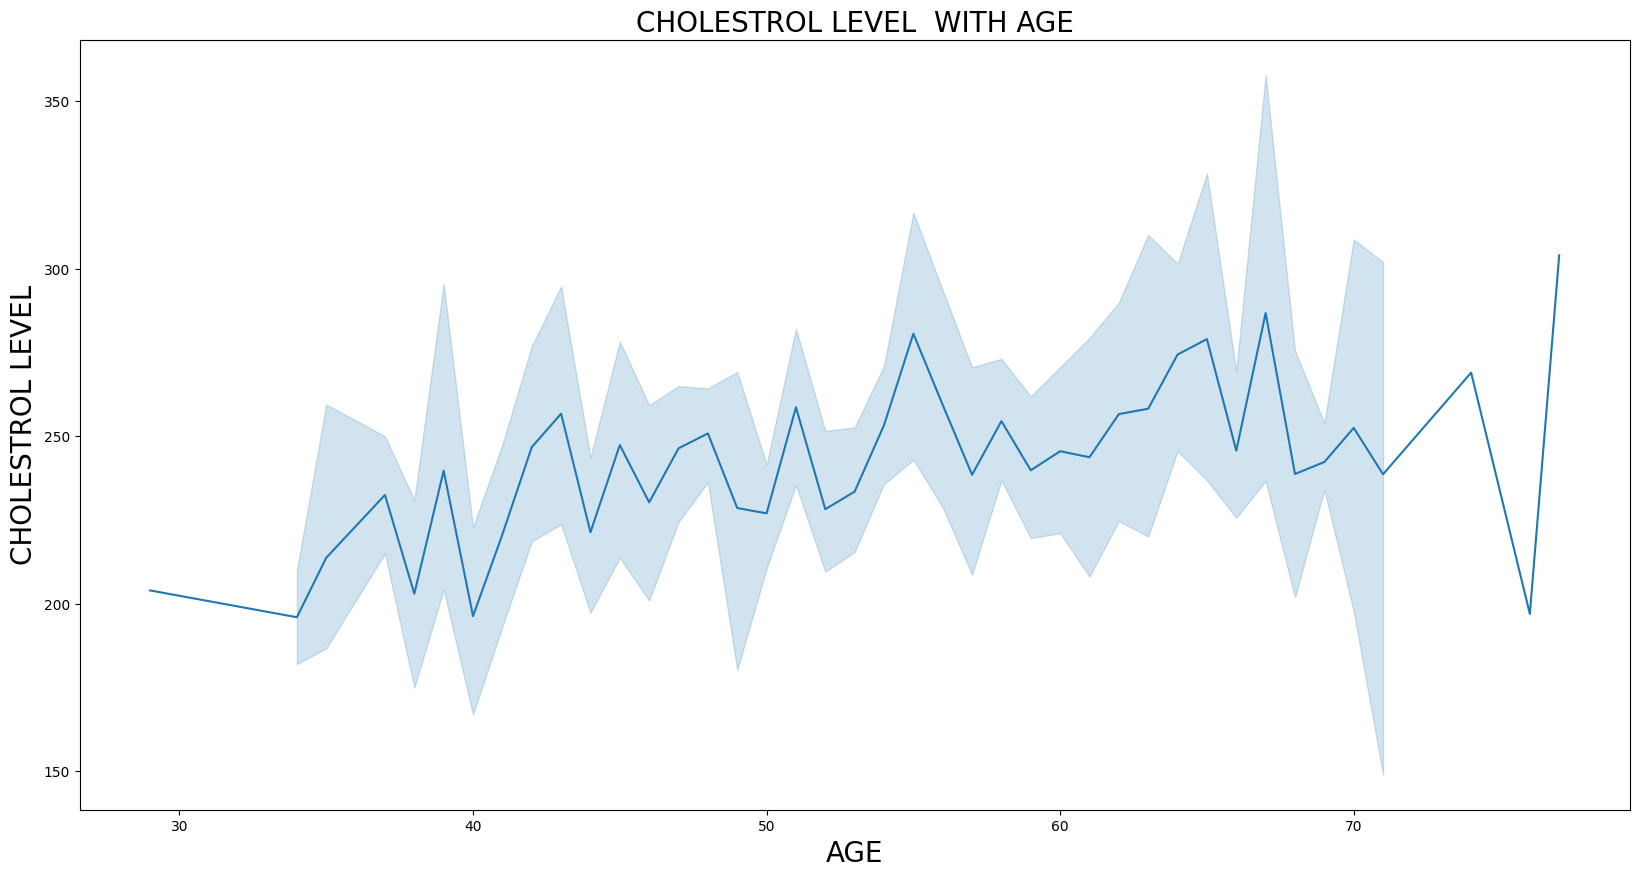

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(y="chol",x="age",data=df)
plt.title("CHOLESTROL LEVEL  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("CHOLESTROL LEVEL",fontsize=20)
plt.show()

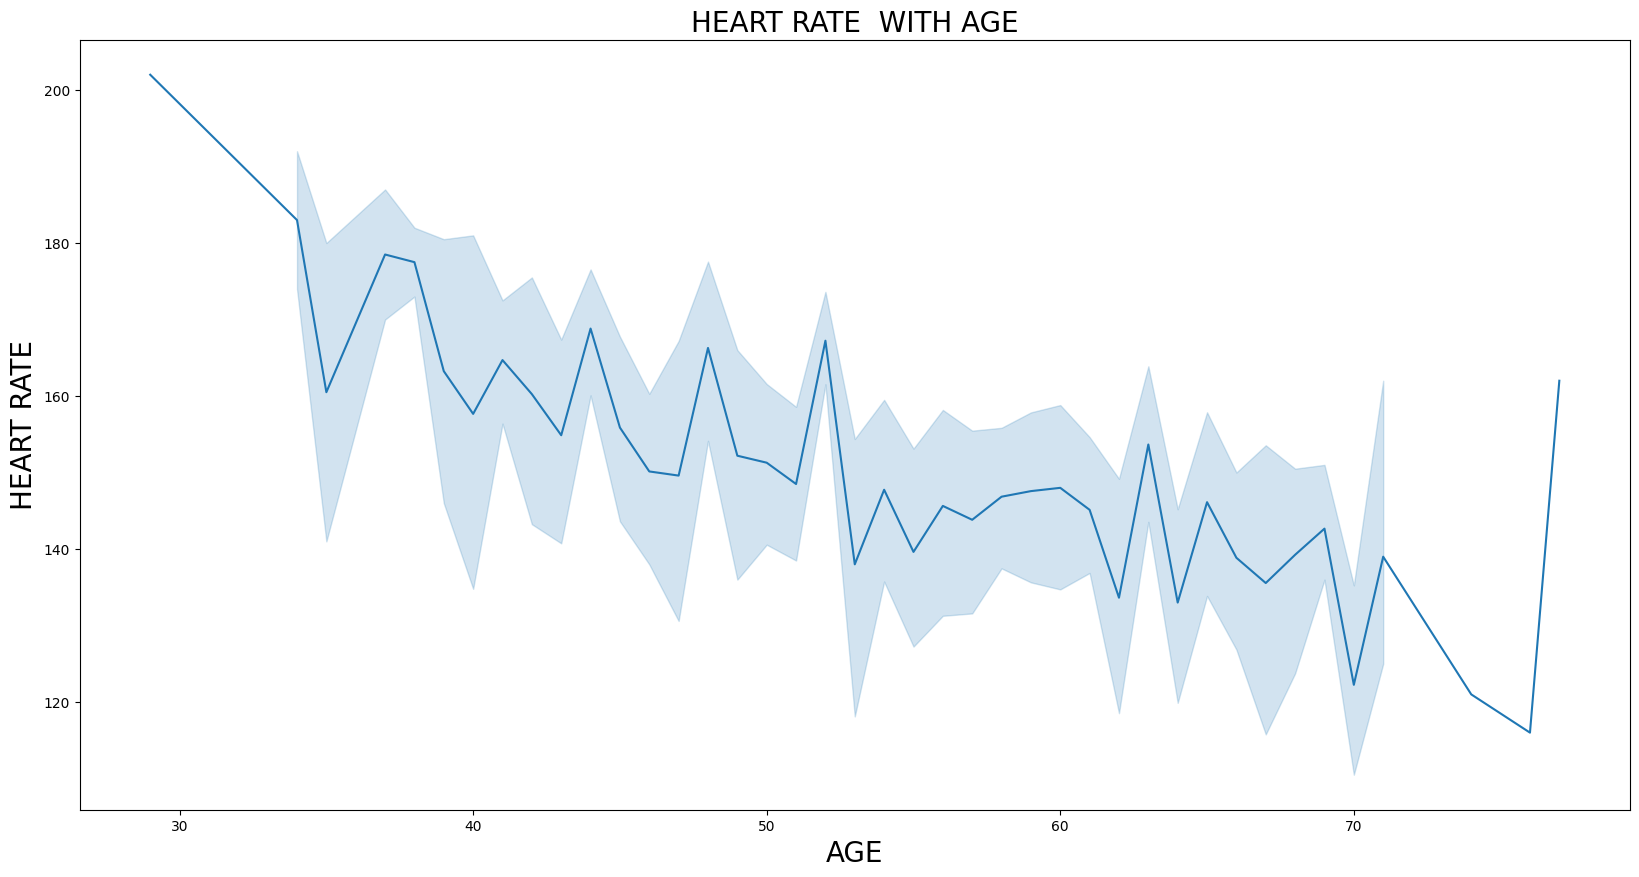

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(y="thalachh",x="age",data=df)
plt.title("HEART RATE  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("HEART RATE",fontsize=20)
plt.show()


3.3 Multi-Variate Analysis:

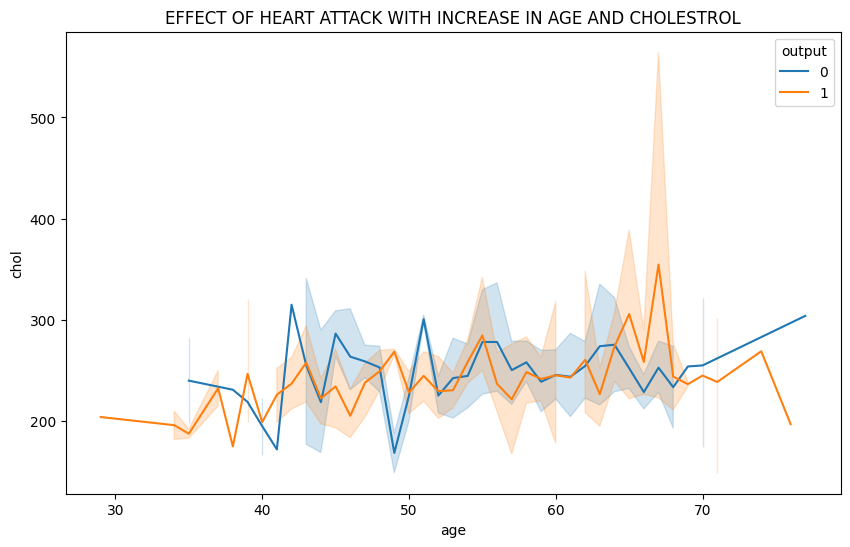

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="chol",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTROL")
plt.show()

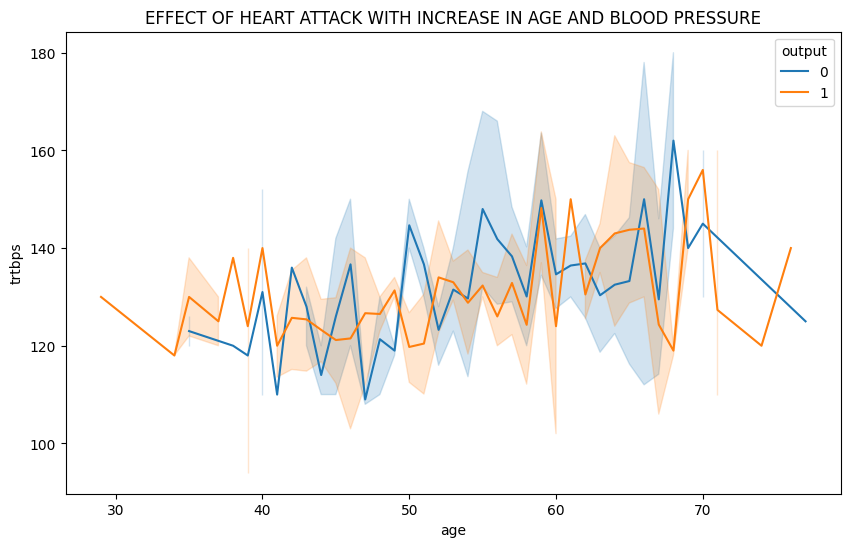

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="trtbps",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND BLOOD PRESSURE")
plt.show()

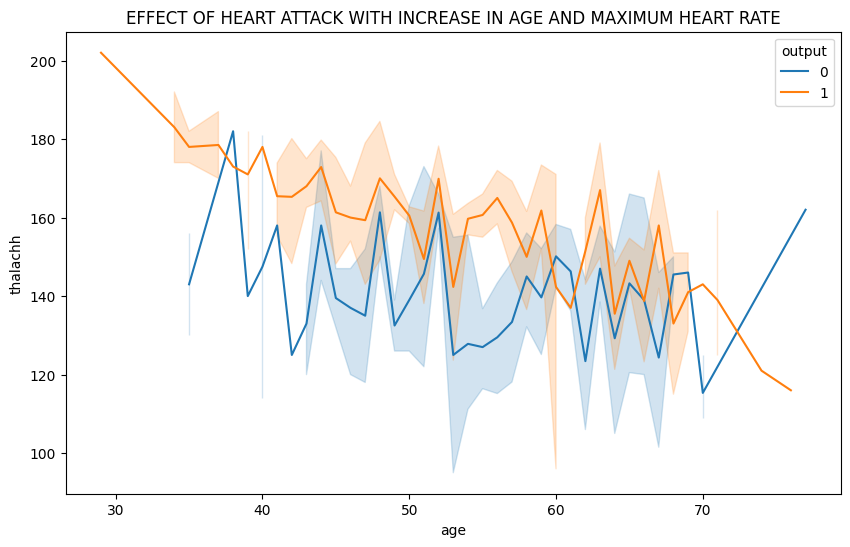

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="thalachh",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
plt.show()

<Axes: >

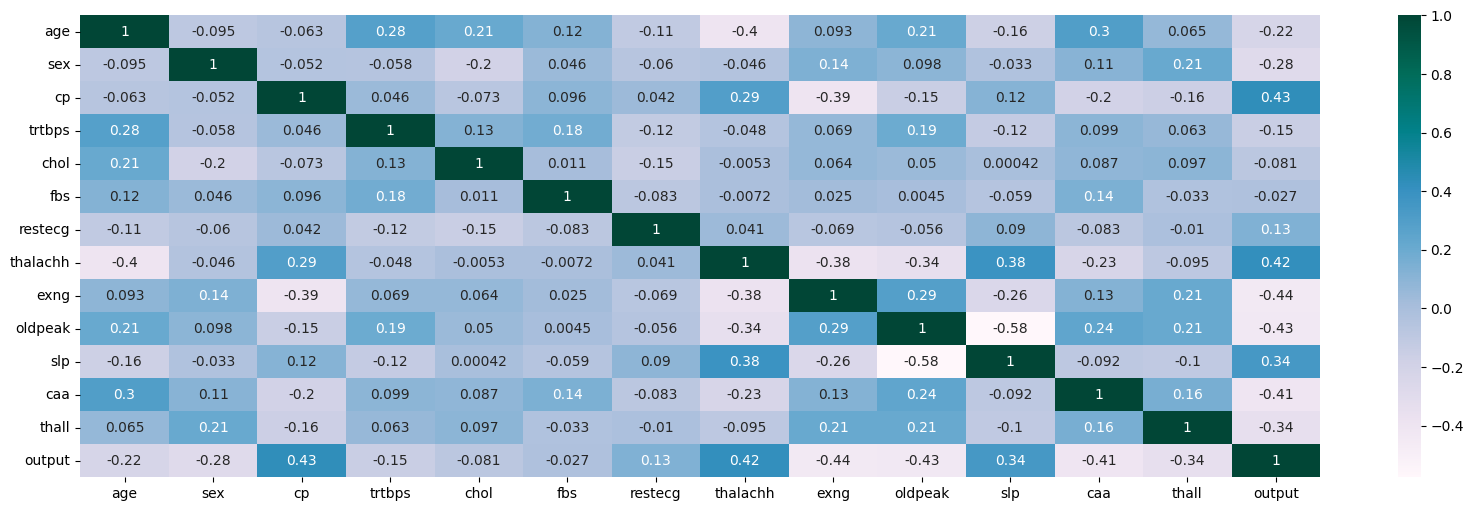

In [24]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

In [25]:
# Q1 
q1 = df.quantile(0.25)
# Q3
q3 = df.quantile(0.75)
# IQR
IQR = q3 - q1
# Outlier range
upper = q3 + IQR * 1.5
lower = q1 - IQR * 1.5
upper_dict = dict(upper)
lower_dict = dict(lower)

In [26]:
for i,v in df.items():
    v_col = v[( v<= lower_dict[i]) | (v >= upper_dict[i])]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column {} outliers = {} => {}%".format(i,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column sex outliers = 0 => 0.0%
Column cp outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column fbs outliers = 302 => 100.0%
Column restecg outliers = 0 => 0.0%
Column thalachh outliers = 1 => 0.331%
Column exng outliers = 0 => 0.0%
Column oldpeak outliers = 8 => 2.649%
Column slp outliers = 0 => 0.0%
Column caa outliers = 24 => 7.947%
Column thall outliers = 2 => 0.662%
Column output outliers = 0 => 0.0%


In [27]:
#Using log transformation
df["age"]= np.log(df.age)
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)
print("---Log Transform performed---")

---Log Transform performed---


In [28]:
X=df.drop("output",axis=1)
y=df["output"]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X=pd.DataFrame(scaler.fit_transform(X))

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [32]:
from sklearn import metrics


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



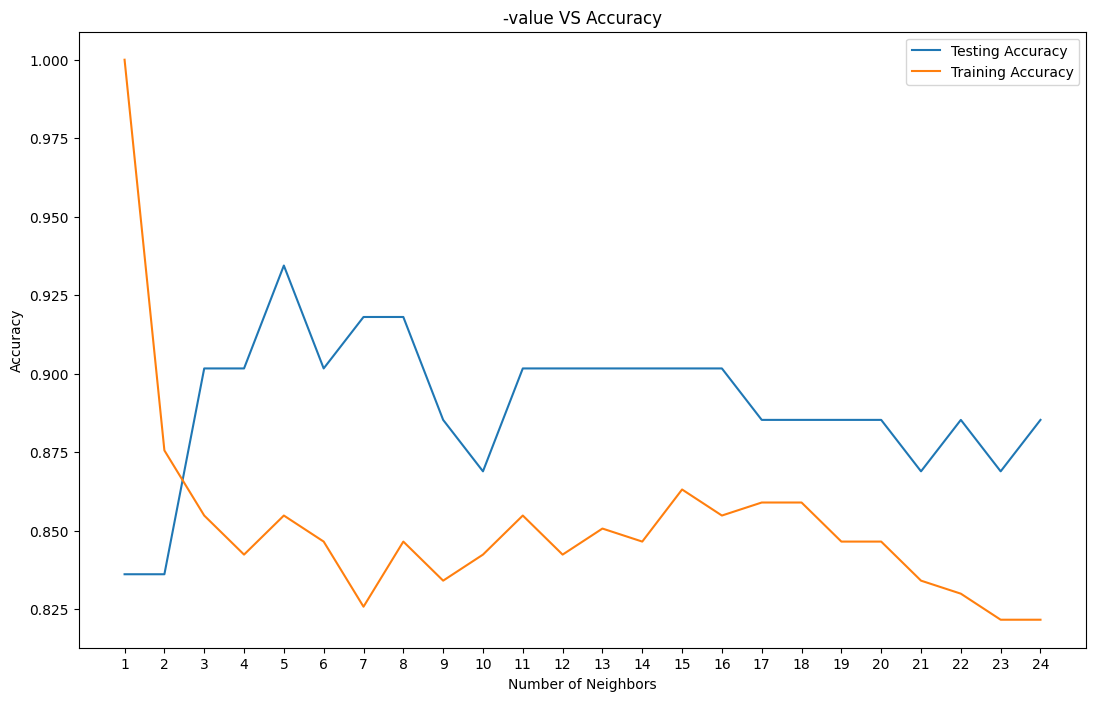

Best accuracy is 0.9344262295081968 with K = 5


In [34]:
from sklearn.neighbors import KNeighborsClassifier
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.9344262295081968 with K = 5


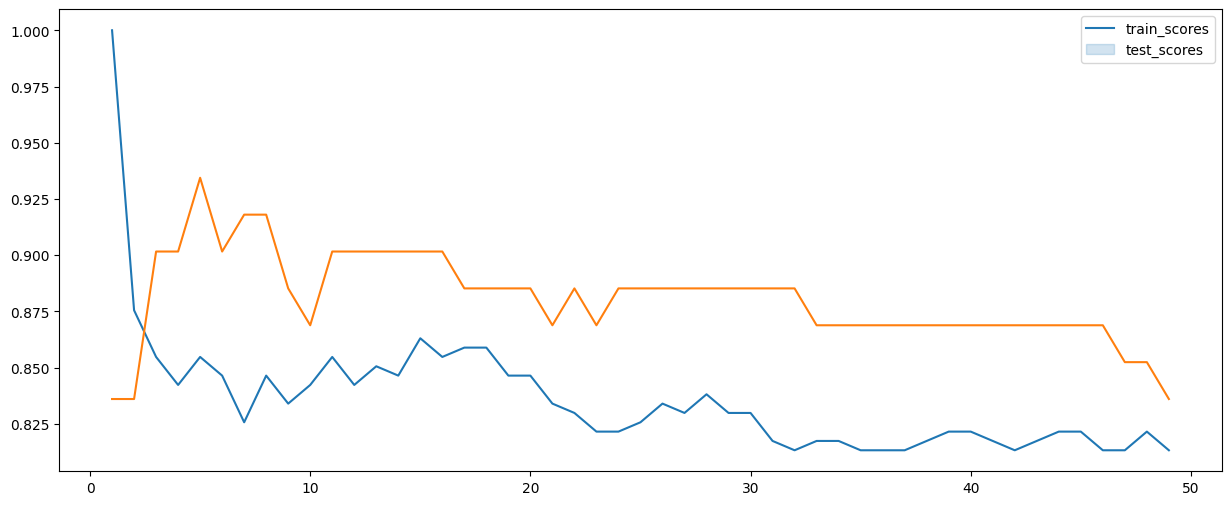

In [35]:
# Assuming you have already defined train_scores and test_scores lists
from sklearn.neighbors import KNeighborsClassifier
train_scores=[]
test_scores=[]
for i in range(1,50):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    train_scores.append(metrics.accuracy_score(y_train,model.predict(X_train)))
    test_scores.append(metrics.accuracy_score(y_test,model.predict(X_test)))
    

plt.figure(figsize=(15, 6))
sns.lineplot(x=np.arange(1, 50), y=train_scores, label="train_scores")
sns.lineplot(x=np.arange(1, 50), y=test_scores, label="test_scores")
plt.legend(["train_scores","test_scores"])
print("Best accuracy is {} with K = {}".format(np.max(test_scores),1+test_scores.index(np.max(test_scores))))

plt.show()


In [36]:
knn= KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
print(metrics.classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [37]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(X,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 21}
Best score: 0.8375907590759075
